In [2]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from mpl_toolkits import mplot3d

In [3]:
t2E = lambda e, t : fsolve(lambda E : E - e*np.sin(E) - t, t/(1 - e))

In [4]:
def compute_eccentricity1(E, ell, m, mu):
    # E is the orbital energy
    # ell is the angular momentum
    # m is
    # mu is
    e = np.sqrt( 1 + ( (2*E*ell**2) / (m**3*mu**2) ) )
    return e   

def compute_eccentricity2(a,b):
    # a - semi-major axis
    # b - semi-minor axis
    e = np.sqrt( 1 - ( (b**2) / (a**2) ) )
    return e  

In [5]:
def compute_time(E,e,a):
    # 398600.4 is a gravitational parameter
    t = a * np.sqrt( a / 398600.4 ) * (E - e * np.sin(E))
    return t

In [6]:
#Using the formula from https://keisan.casio.com/exec/system/1224665242
def compute_orbital_period(h):
    v = np.sqrt( 398600.5 / ( 6378.14 + h ) )
    P = 2 * np.pi * ( ( 6378.14 + h ) / v )
    return P

In [7]:
def compute_semi_axis(P,G,M):
    a = np.cbrt( ( P**2 * G * M ) / ( 4 * np.pi**2 ) )
    b = a
    return a, b

In [8]:
# Constant terms

n = 1000 # plot points
t = np.linspace(0, 10, n) # Time (not sure how to interpret)

theta = 83 # Inclination
lamb = 45 # Angular something

In [21]:
a = 20
b = 10
e = compute_eccentricity2(a,b)

E = t2E(e, t)
u = a * ( np.cos(E) - e )
v = b * np.sin(E)

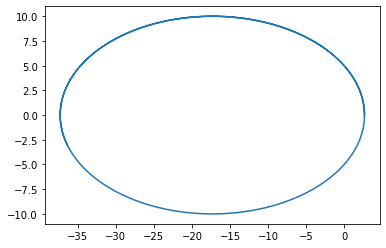

In [22]:
plt.plot(u,v)

In [11]:
n = [np.cos(lamb) * np.sin(theta), np.sin(lamb) * np.sin(theta), np.cos(theta)]
k = [0,0,1]

P = np.cross(n,k)
Q = np.cross(n,P)

In [12]:
X = u*P[0] + v*Q[0]
Y = u*P[1] + v*Q[1]
Z = u*P[2] + v*Q[2]

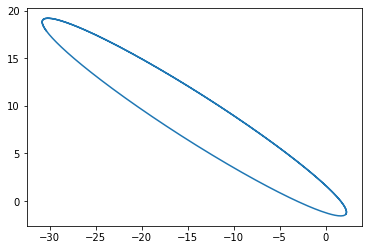

In [13]:
plt.plot(X,Y)

In [14]:
@widgets.interact( t = (0, np.size(X)-1, 1), color=['blue', 'red', 'green'])
   
def plot(t=0., color='green', grid=True):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.plot3D(X,Y,Z)
    ax.scatter3D(X[t],Y[t],Z[t], color=color)
    ax.grid(grid)


interactive(children=(IntSlider(value=0, description='t', max=999), Dropdown(description='color', index=2, opt…

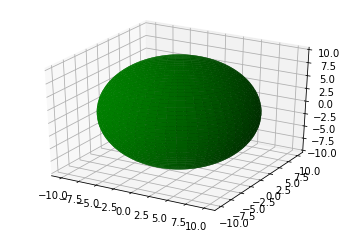

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, color='g')
plt.show()

In [16]:
@widgets.interact( t = (0, np.size(X)-1, 1), color=['blue', 'red', 'green'])
   
def plot(t=0., color='green', grid=True):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, z, color='g')
    ax.plot3D(X,Y,Z)
    ax.scatter3D(X[t],Y[t],Z[t], color=color)
    ax.grid(grid)

interactive(children=(IntSlider(value=0, description='t', max=999), Dropdown(description='color', index=2, opt…

In [18]:
@widgets.interact( t = (0, np.size(X)-1, 1), color=['blue', 'red', 'green'])
   
def plot(t=0., color='green', grid=True):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, z, color='g')
    ax.plot3D(X+,Y,Z)
    ax.scatter3D(X[t],Y[t],Z[t], color=color)
    ax.grid(grid)


interactive(children=(IntSlider(value=0, description='t', max=999), Dropdown(description='color', index=2, opt…